In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data_set .csv')
labels = pd.read_csv('labels.csv', delimiter=';')
data = data.merge(labels, how='left', left_on='appsflyer_id', right_on='Appsflyer_id')
data['is_fraud'] = ~data['Fraud_reasons'].isnull()

In [4]:
data['install_time'] = pd.to_datetime(data['install_time'])
data['attributed_touch_time'] = pd.to_datetime(data['attributed_touch_time'])
data['tti'] = (data['install_time'] - data['attributed_touch_time']).dt.total_seconds()
data['tti_contributor1'] = (pd.to_datetime(data['install_time']) 
                             - pd.to_datetime(data['contributor_1_touch_time'], errors='coerce')).dt.total_seconds()
data['tti_contributor2'] = (pd.to_datetime(data['install_time']) 
                             - pd.to_datetime(data['contributor_2_touch_time'], errors='coerce')).dt.total_seconds()
data['tti_contributor3'] = (pd.to_datetime(data['install_time']) 
                             - pd.to_datetime(data['contributor_3_touch_time'], errors='coerce')).dt.total_seconds()
data['install_time_since_midnight_sec'] = (data['install_time'] - 
                                           pd.to_datetime(data['install_time'].dt.date)) / np.timedelta64(1, 's')

In [5]:
data.head()

,site_id,appsflyer_id,publisher,sub_site_id,date,app_id,app_version,attributed_touch_time,attributed_touch_type,operator,...,App_id,Publisher (media_source),Site_id,Fraud_reasons,is_fraud,tti,tti_contributor1,tti_contributor2,tti_contributor3,install_time_since_midnight_sec
0,0,148552020,AA,0,2017-10-17,id966165025,3006005000,2017-10-17 21:20:31,click,NaN,...,NaN,NaN,NaN,NaN,False,179.0,15986.0,NaN,NaN,77010.0
1,2588,6912501,AA,1133,2017-10-08,ng.jiji.app,3004002000,2017-10-08 17:46:52,click,MTN NG,...,NaN,NaN,NaN,NaN,False,10.0,12.0,748.0,NaN,64022.0
2,2588,142889582,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 11:00:39,click,MTN - NG,...,NaN,NaN,NaN,NaN,False,18.0,145.0,409014.0,NaN,39657.0
3,2588,491337173,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 13:38:31,click,Airtel,...,NaN,NaN,NaN,NaN,False,24.0,40.0,NaN,NaN,49135.0
4,2588,156920862,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 13:59:55,click,MTN NG,...,NaN,NaN,NaN,NaN,False,1782.0,497520.0,NaN,NaN,52177.0


In [6]:
data.columns

Index(['site_id', 'appsflyer_id', 'publisher', 'sub_site_id', 'date', 'app_id',
       'app_version', 'attributed_touch_time', 'attributed_touch_type',
       'operator', 'city', 'country_code', 'device_type',
       'contributor_1_publisher', 'contributor_1_touch_time',
       'contributor_2_publisher', 'contributor_2_touch_time',
       'contributor_3_publisher', 'contributor_3_touch_time', 'install_time',
       'language', 'os_version', 'sdk_version', 'wifi', 'Appsflyer_id',
       'App_id', 'Publisher (media_source)', 'Site_id', 'Fraud_reasons',
       'is_fraud', 'tti', 'tti_contributor1', 'tti_contributor2',
       'tti_contributor3', 'install_time_since_midnight_sec'],
      dtype='object')

In [ ]:
labels.head()

In [57]:
pd.Series(data['device_type'].unique()).head()

0           iPhone 5
1    TECNO-TECNO WX3
2    Aspire3-Aspire3
3     TECNO-TECNO-Y6
4     TECNO-TECNO_W4
dtype: object

In [33]:
data.shape

(461500, 35)

In [34]:
labels.shape

(93453, 5)

### 20% is labeled as fraud

In [35]:
len(labels)/len(data)

0.20249837486457203

### helpers

In [36]:
def plot_distributions(df, column, min_limit=0):
    plt.figure(figsize=(10,5))
    labels_value_counts = df[column].value_counts() 
    labels_value_counts = labels_value_counts[labels_value_counts > min_limit]
    labels_value_counts.plot(kind = 'bar', rot=False)
    plt.title(column + ' distribution')

def plot_countplot_per_is_fraud(df, column, min_limit=0):
    plt.figure(figsize=(10,5))
    value_counts = data[column].value_counts()
    plt.figure(figsize=(10,10))
    ax = sns.countplot(y=column, hue='is_fraud', data=data[
        data[column].isin(value_counts[value_counts > min_limit].index.values)])

### Fraud reasons distribution

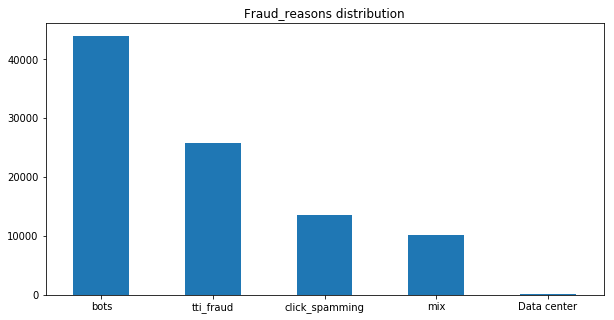

In [37]:
plot_distributions(labels, 'Fraud_reasons')

In [14]:
(labels['Fraud_reasons'] == 'Data center').sum()

102

### Almost all are android app installs

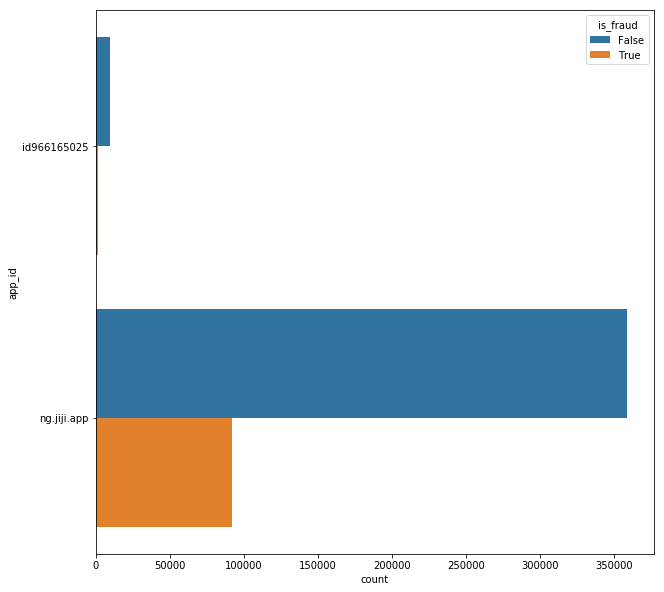

In [38]:
plot_countplot_per_is_fraud(data, 'app_id')

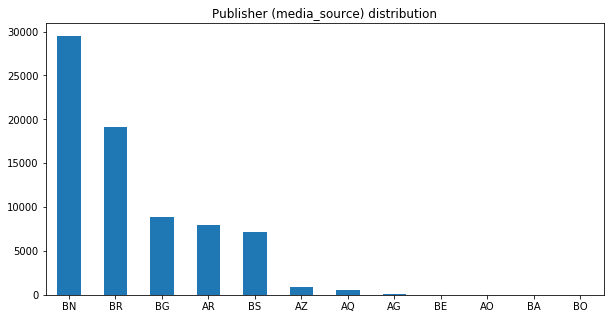

In [39]:
plot_distributions(labels, 'Publisher (media_source)')

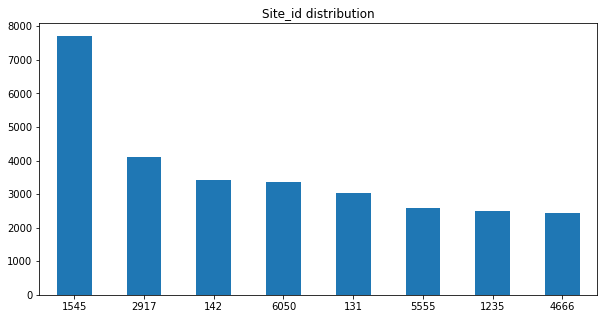

In [40]:
plot_distributions(labels, 'Site_id', 2000)

### The vast majority of installs are not via wifi

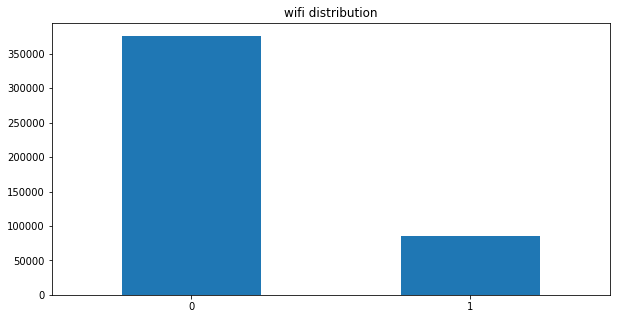

In [41]:
plot_distributions(data, 'wifi')

### If the install is via wifi it is just 25% less likely that it is a fraud

,is_fraud
wifi,
0,0.178389
1,0.747138


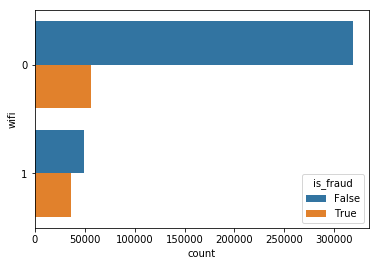

In [42]:
ax = sns.countplot(y='wifi', hue='is_fraud', data=data)
data.groupby('wifi').agg({'is_fraud': lambda x: x.sum()/(~x).sum()})

### There are some app versions that have 50% percent fraud installs

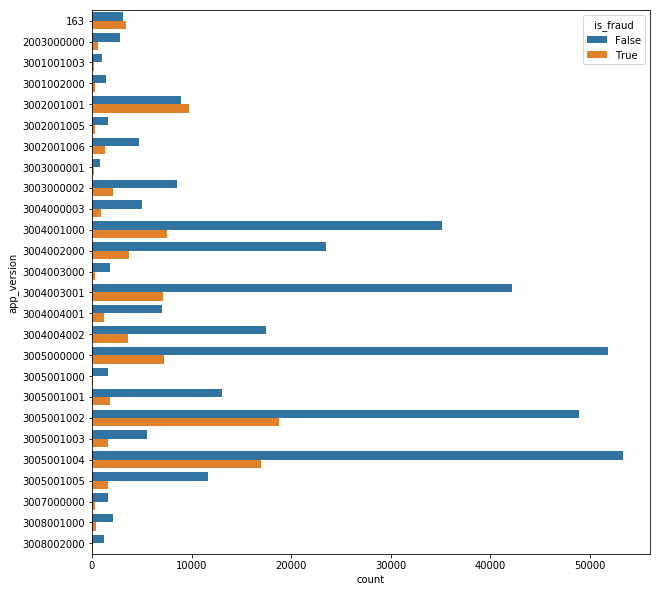

In [43]:
app_version_value_counts = data['app_version'].value_counts()
plt.figure(figsize=(10,10))
ax = sns.countplot(y='app_version', hue='is_fraud', data=data[
    data['app_version'].isin(app_version_value_counts[app_version_value_counts > 1000].index.values)])

### All frauds are have attributed_touch_type = click

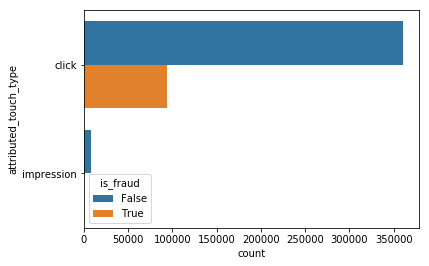

In [44]:
ax = sns.countplot(y='attributed_touch_type', hue='is_fraud', data=data)

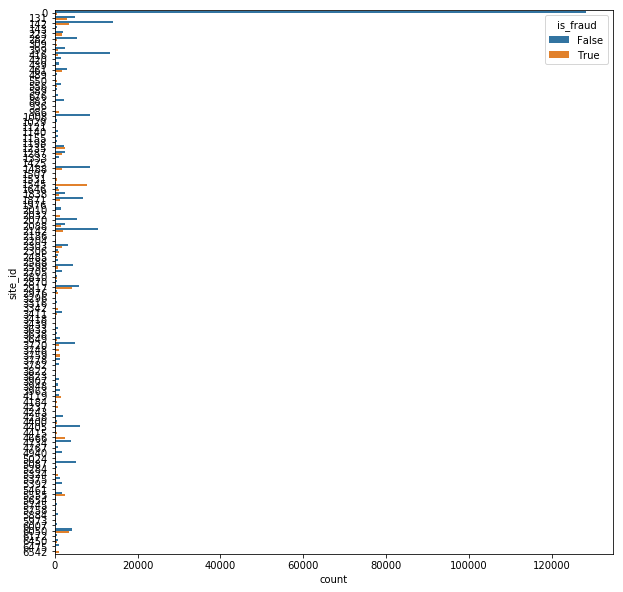

In [45]:
plot_countplot_per_is_fraud(data, 'site_id', min_limit=500)

### There is no really fraud operators

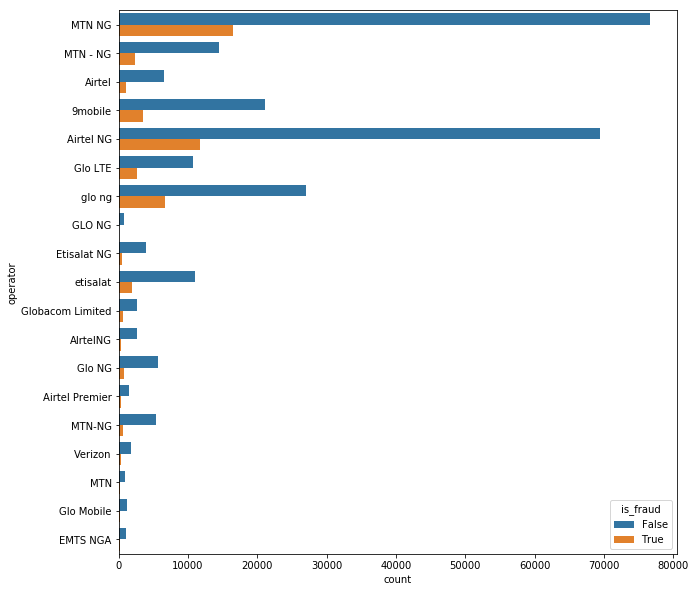

In [46]:
plot_countplot_per_is_fraud(data, 'operator', min_limit=500)

### There are languages that  are used only in fraud

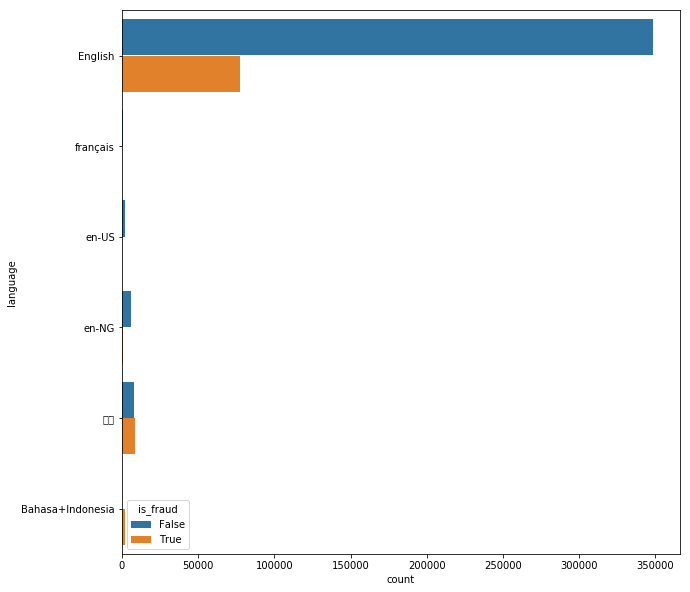

In [47]:
plot_countplot_per_is_fraud(data, 'language', min_limit=1000)

### Sdk version distribution

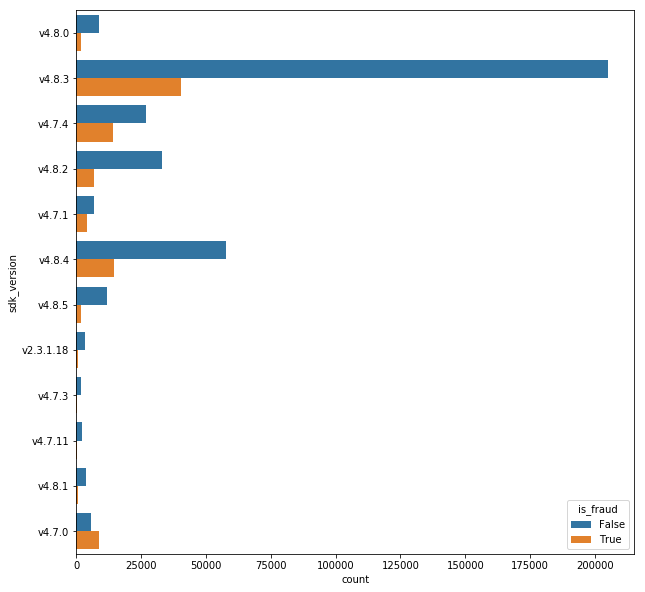

In [48]:
plot_countplot_per_is_fraud(data, 'sdk_version', min_limit=1000)

### OS version distribution

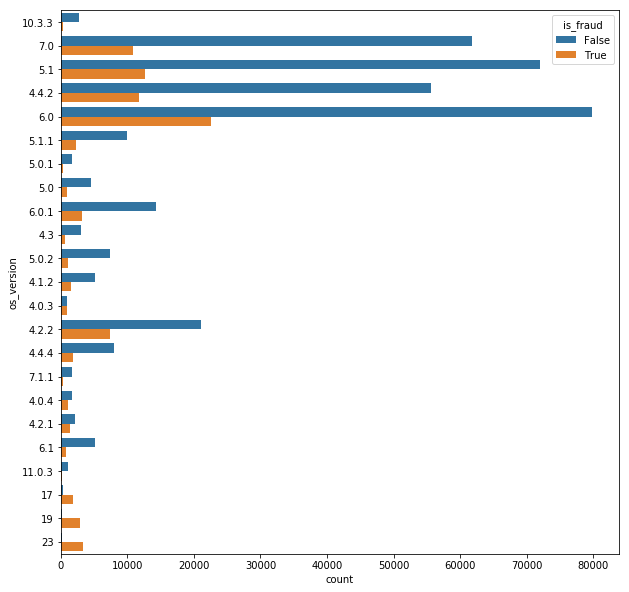

In [49]:
plot_countplot_per_is_fraud(data, 'os_version', min_limit=1000)

### All the traffic actually comes from NG

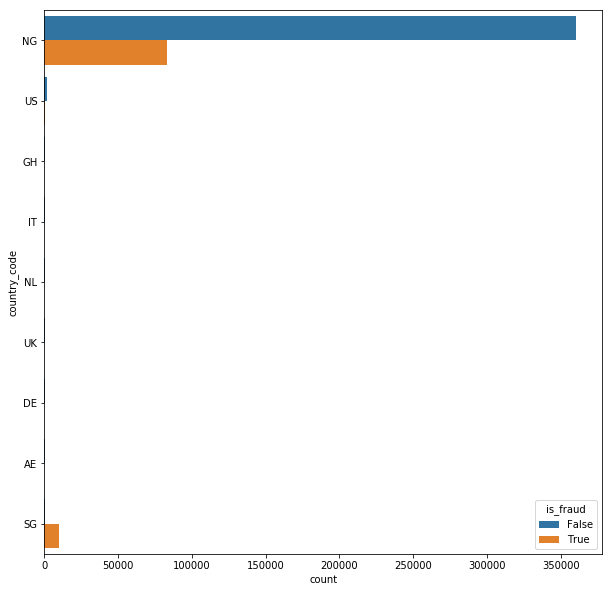

In [50]:
    plot_countplot_per_is_fraud(data, 'country_code', min_limit=200) 

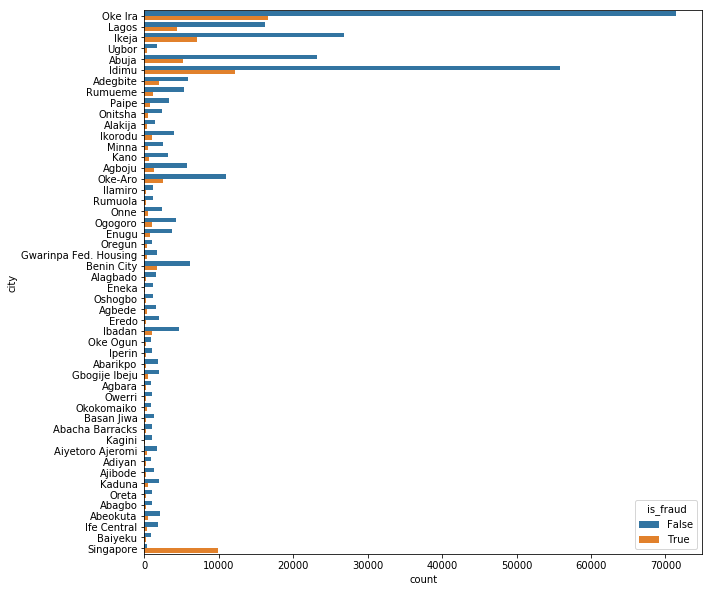

In [51]:
plot_countplot_per_is_fraud(data, 'city', min_limit=1000) 

### Publisher distribution

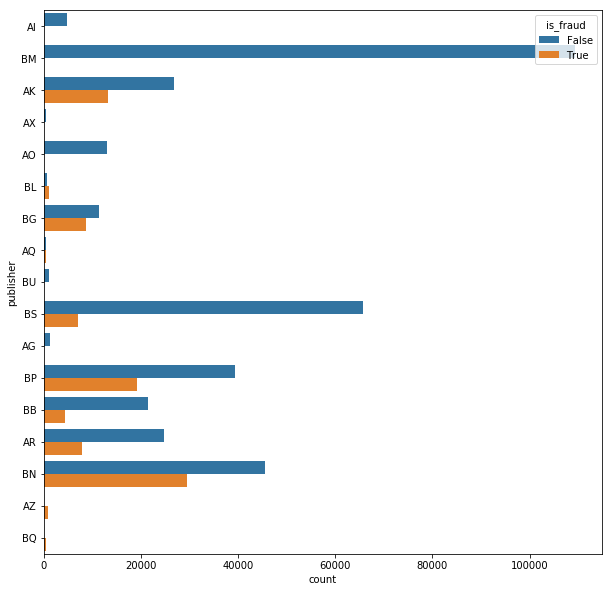

In [52]:
plot_countplot_per_is_fraud(data, 'publisher', min_limit=500) 

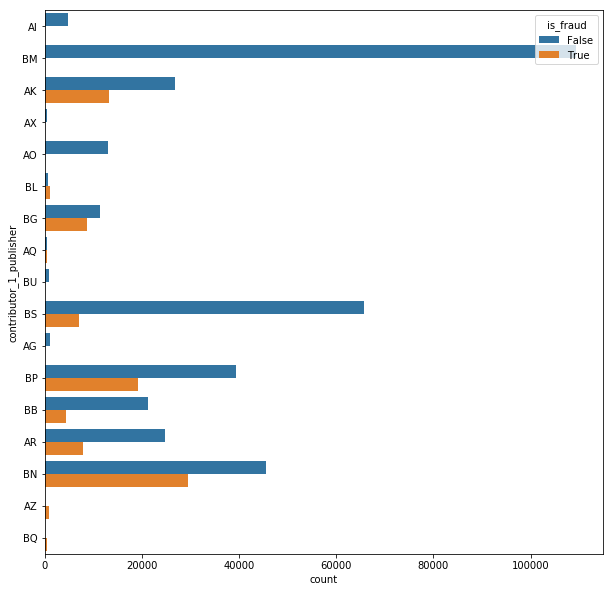

In [53]:
plot_countplot_per_is_fraud(data, 'contributor_1_publisher', min_limit=500)

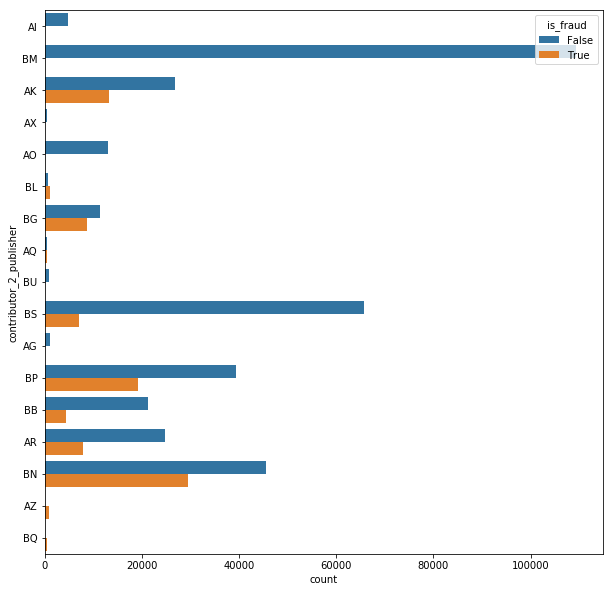

In [54]:
plot_countplot_per_is_fraud(data, 'contributor_2_publisher', min_limit=500)

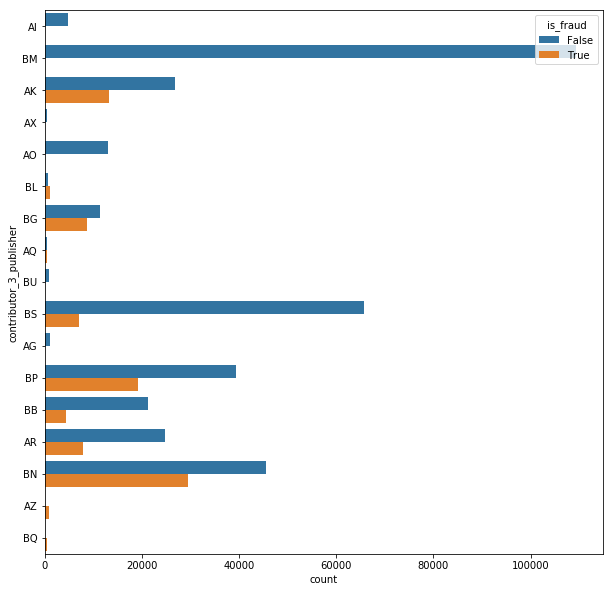

In [55]:
plot_countplot_per_is_fraud(data, 'contributor_3_publisher', min_limit=500)

### Distributions of sec_touch_install

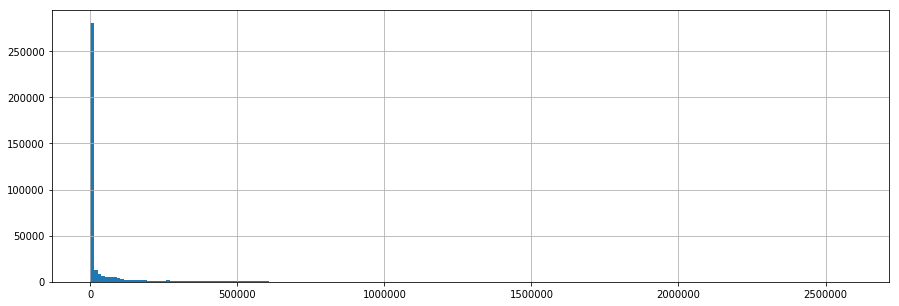

In [58]:
plt.figure(figsize=(15,5))
data[~data['is_fraud']]['tti'].hist(bins=200)

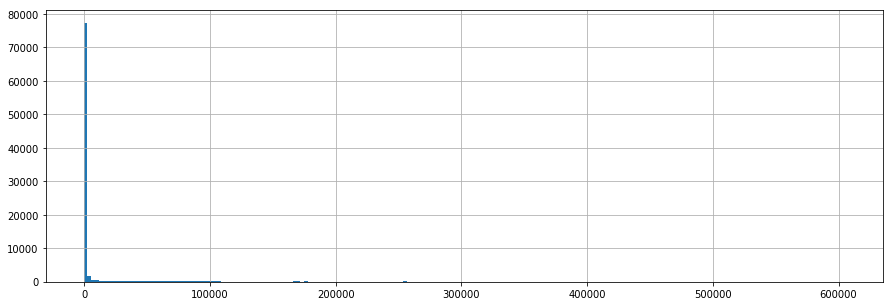

In [59]:
plt.figure(figsize=(15,5))
data[data['is_fraud']]['tti'].hist(bins=200)

(0, 200)

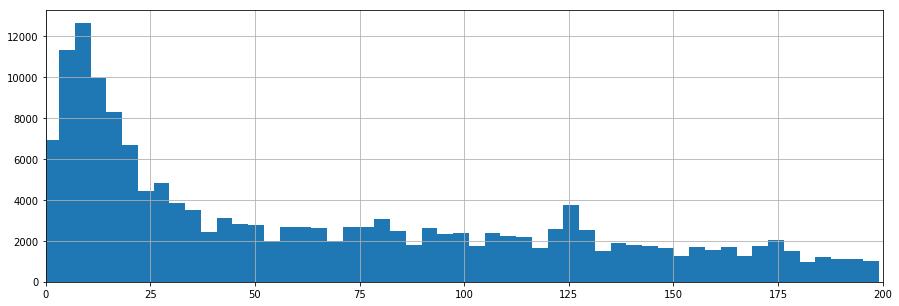

In [60]:
plt.figure(figsize=(15,5))
data[(~data['is_fraud']) & (data['tti'] < 200)]['tti'].hist(bins=200)
plt.xlim(0, 200)

(0, 200)

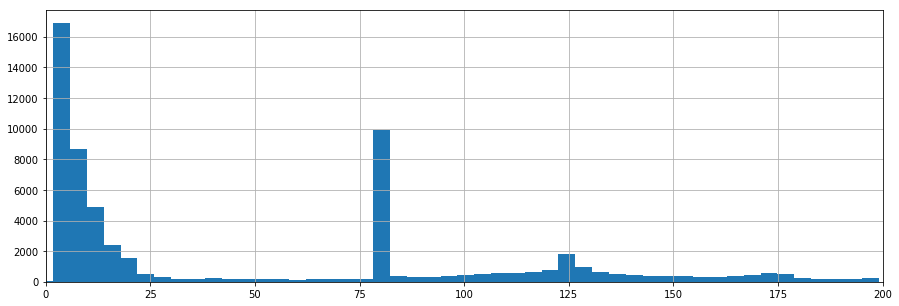

In [61]:
plt.figure(figsize=(15,5))
data[(data['is_fraud']) & (data['tti'] < 200)]['tti'].hist(bins=200)
plt.xlim(0, 200)

(0, 60)

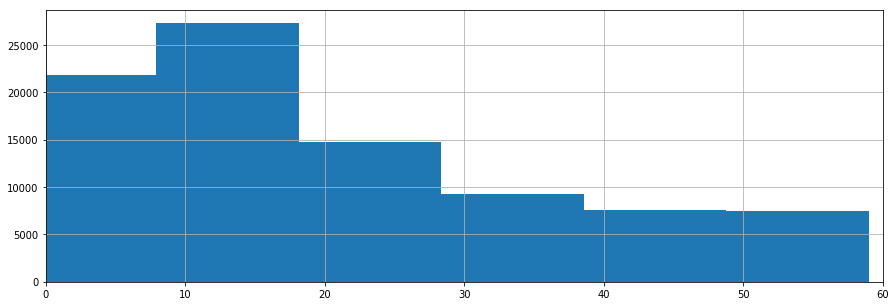

In [62]:
plt.figure(figsize=(15,5))
data[(~data['is_fraud']) & (data['tti'] < 60)]['tti'].hist(bins=60)
plt.xlim(0, 60)

(0, 60)

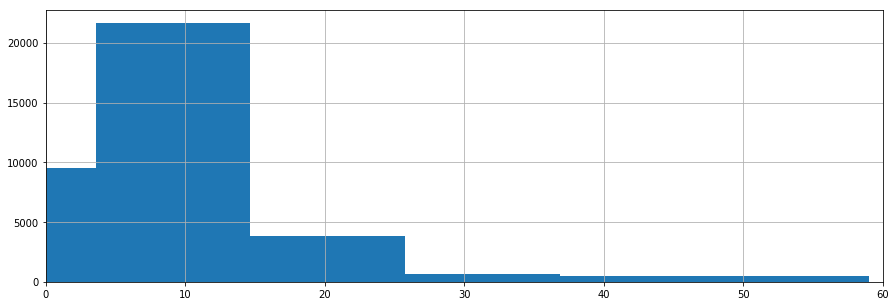

In [63]:
plt.figure(figsize=(15,5))
data[(data['is_fraud']) & (data['tti'] < 60)]['tti'].hist(bins=60)
plt.xlim(0, 60)

### TTI distribution per fraud

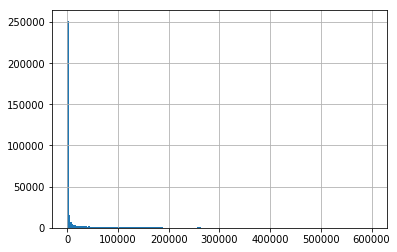

In [79]:
data[(~data['is_fraud']) & (data['tti'] < 600000)]['tti'].hist(bins=200)

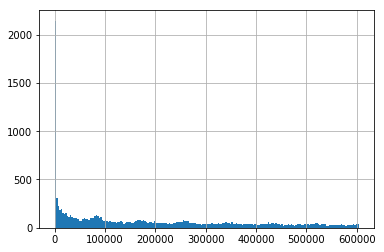

In [74]:
data[(data['Fraud_reasons'] == 'click_spamming')]['tti'].hist(bins=200)

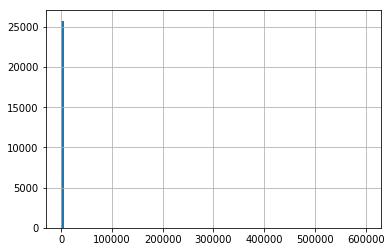

In [85]:
data[(data['Fraud_reasons'] == 'tti_fraud')]['tti'].hist(bins=100)

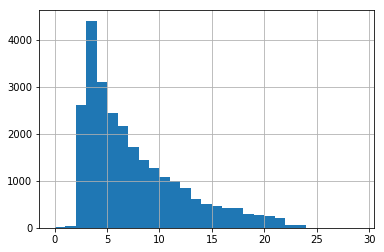

In [130]:
data[(data['Fraud_reasons'] == 'tti_fraud') & (data['tti'] < 30)]['tti'].hist(bins=range(0, 30))

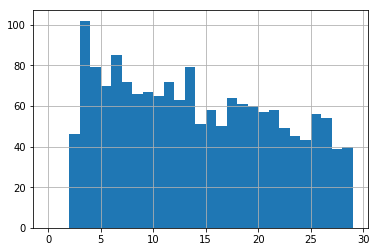

In [131]:
data[(data['Fraud_reasons'] == 'bots') & (data['tti'] < 30)]['tti'].hist(bins=range(0, 30))

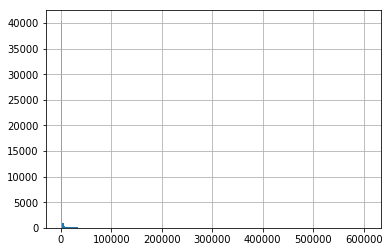

In [132]:
data[(data['Fraud_reasons'] == 'bots')]['tti'].hist(bins=200)

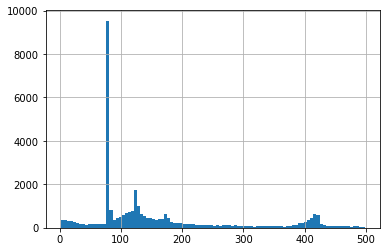

In [146]:
data[(data['Fraud_reasons'] == 'bots') & (data['tti'] < 500)]['tti'].hist(bins=100)

(0, 500)

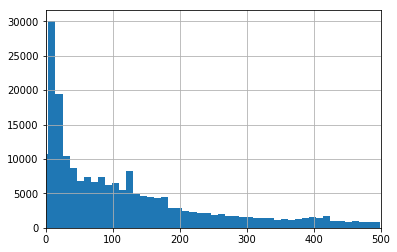

In [148]:
data[(~data['is_fraud']) & (data['tti'] < 500)]['tti'].hist(bins=100)
plt.xlim(0, 500)

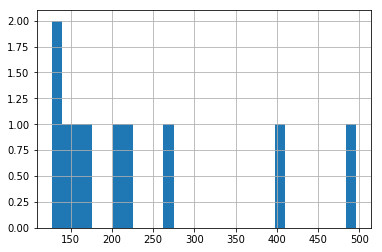

In [13]:
data[(data['Fraud_reasons'] == 'Data center') & (data['tti'] < 500)]['tti'].hist(bins=30)

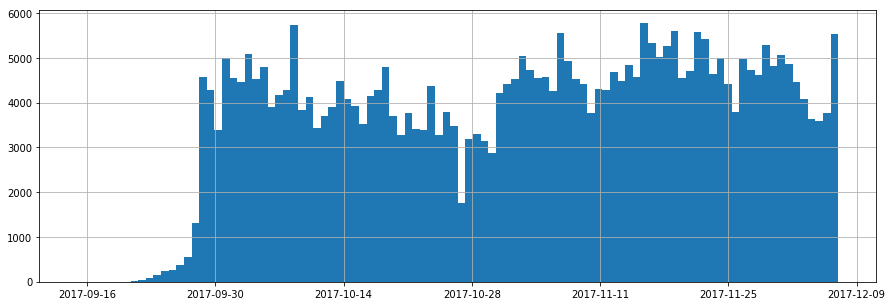

In [64]:
plt.figure(figsize=(15,5))
data[~data['is_fraud']]['attributed_touch_time'].hist(bins=100)

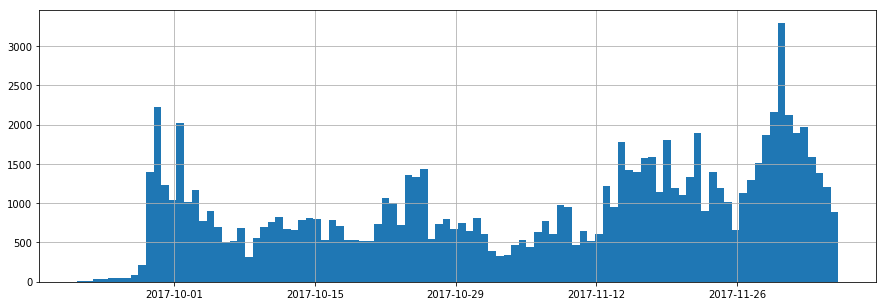

In [65]:
plt.figure(figsize=(15,5))
data[data['is_fraud']]['attributed_touch_time'].hist(bins=100)

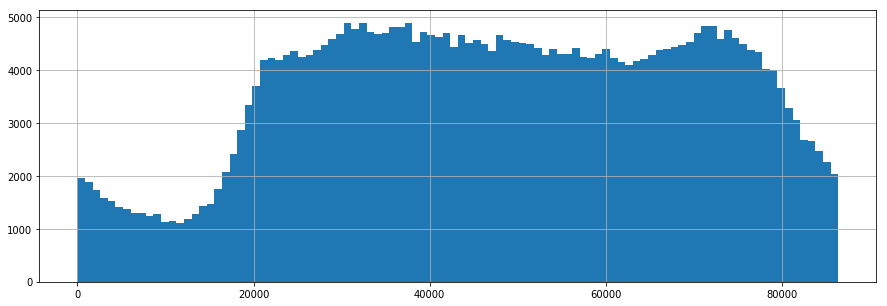

In [66]:
plt.figure(figsize=(15,5))
data[~data['is_fraud']]['install_time_since_midnight_sec'].hist(bins=100)

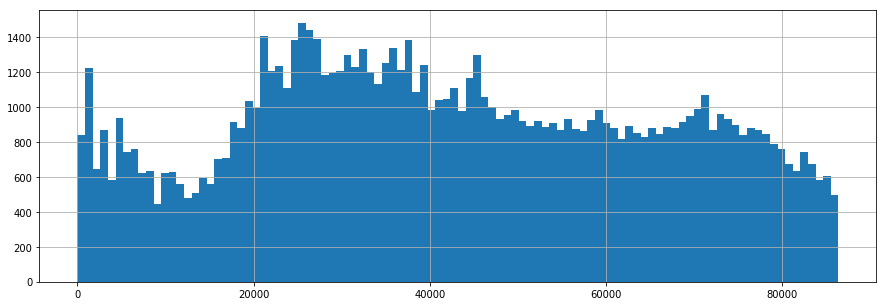

In [67]:
plt.figure(figsize=(15,5))
data[data['is_fraud']]['install_time_since_midnight_sec'].hist(bins=100)

In [68]:
data[data['tti'] == 0]['is_fraud'].value_counts()

False    251
True      15
Name: is_fraud, dtype: int64

In [69]:
data[data['tti'] > (3600 * 24)]['is_fraud'].value_counts()

False    45655
True      9275
Name: is_fraud, dtype: int64

In [70]:
trustworthy_publisher_marker = (data['publisher'] == 'AX')|(data['publisher'] == 'AG')
(data[trustworthy_publisher_marker]['tti'] > (3600 * 24)).sum()/trustworthy_publisher_marker.sum()

0.12459371614301191

In [71]:
(data[~trustworthy_publisher_marker]['tti'] > (3600 * 24)).sum()/(~trustworthy_publisher_marker).sum()

0.1190025540950367

In [72]:
trustworthy_publisher_marker.sum()/len(trustworthy_publisher_marker)

0.0040000000000000001